# Importing all the necessary modules

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the dataset

In [13]:
df = pd.read_csv("creditcard.csv")

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print("Total no of rows and columns are {}".format(df.shape))

Total no of rows and columns are (284807, 31)


In [16]:
df.isnull().sum() # there are no null values in any columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


# Satistical Analysis of fraud and not fraud 

In [19]:
print ('Not Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Not Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


Non Fraud %  99.83
Fraud %     0.17


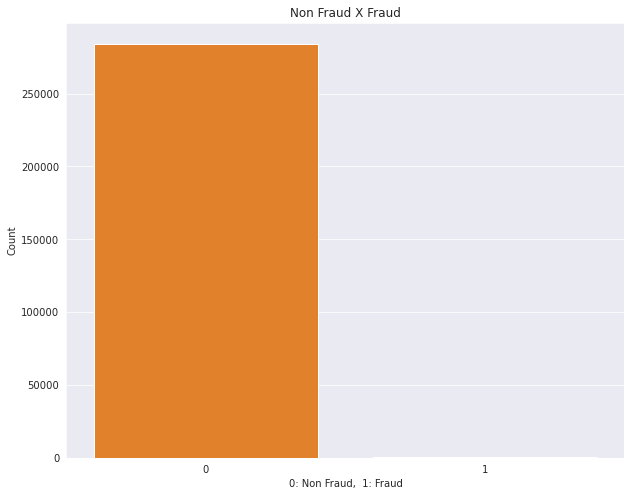

In [20]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

# Seperation of input variables from target variables

In [21]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]
print(feature_names, end = "\n\n")
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Index(['Class'], dtype='object')


# Spliting the dataset into training and testing with sklearn module

In [30]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size = 0.70, test_size = 0.30, random_state = 1)

In [31]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [25]:
y_train.head()

NameError: name 'y_train' is not defined

In [26]:
y_test.head()

NameError: name 'y_test' is not defined

# Fitting the model with Logistic Regression algorithm

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Training the model

In [32]:
lr.fit(X_train, y_train)

LogisticRegression()

# Confusion Matrix - Model performance measures

In [38]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [39]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred


In [ ]:
X_test.head()

In [43]:
df.iloc[169876, 30] # row and columns

0

In [44]:
a = np.array(X_test.iloc[0])

In [45]:
a = a.reshape(1, -1)

In [46]:
pred2 = lr.predict(a)
pred2

array([0])

# Classification Report - Model performance measures

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [41]:
cmat, pred = RunModel(lr, X_train, y_train, X_test, y_test) #calling the Runmodel function

In [42]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [35]:
accuracy_score(y_test, pred)

NameError: name 'pred' is not defined

In [47]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.53      0.65       135

    accuracy                           1.00     85443
   macro avg       0.91      0.77      0.82     85443
weighted avg       1.00      1.00      1.00     85443

